In [82]:
from pylab import *
from scipy.integrate import odeint
%matplotlib inline

### 1. Considere una partícula constreñida a moverse en un círculo de radio R. 
De esta manera la energía del sistema es $E =\frac{p^2}{2mR^2}$ que corresponde a un movimiento con velocidad angular constante $\dot{θ}=ω=\frac{p}{mR^2}$. Ahora pensemos en que el sistema es perturbado por una fuerza impulsiva cada tiempo $τ$ con la misma intensidad $\epsilon$ en la misma dirección y sentido. Esto quiere decir que dependiendo de la posición de la partícula sobre el círculo, la fuerza actuará sobre la componente tangencial. 

El efecto de esta perturbación es que hace un cambio instantáneo en el valor del momento angular. En el momento en el que la fuerza anterior actúa sobre la masa, ésta se encuentra en la posición $θ(t)$ y en ese instante el cambio en la cantidad de movimiento es $∆p = \epsilon cos θ$. Esto quiere decir que $p$ permanecerá constante hasta que transcurra un periodo $τ$ y en ese momento sufrirá un cambio instantáneo $∆p$, posteriormente permanecerá constante hasta que se cumpla un periodo más. Por otro lado, $θ$ tiene la forma $θ = θ_0 + ωt$, módulo $2π$.

Para analizar el comportamiento del sistema se utiliza una técnica parecida al mapeo de Poicaré. Como la perturbación es periódica podemos tomar un punto en el espacio fase y mapearlo a aquel en el que estará un instante $τ$ después. Supongamos que las coordenadas iniciales antes de la perturbación son $θ_0$, $p_0$ y escoja algún valor de $τ$. 

(a) Muestre que en el mapeo, los valores subsecuentes son:

$$
θ_{i+1} = θ_{i} + \frac{p_{i+1}}{mR^2}τ (mod. 2π)
$$

$$
p_{i+1} = p_{i} + \epsilon cos(θ_{i})
$$

donde se ha tomado en cuenta que en el instante en el que la fuerza actúa, $θ$ tiene el valor $θ_i$.

De aquí en adelante considere $m = 1$ y $R = 1$.


Dado que hacemos un mapeo cada tiempo $\tau$, es decir, $\tau=t_{i+1}-t_{i}$ y sabiendo que $p=p_{0}$, antes que el sistema sea perturbado, la perturbación tangencial ocaciona que el cambio de momento $\delta p=\epsilon cos(\theta)$, ya que solo afecta en la direccion tangente al círculo.

$$
p_{1}=p_{0}+\Delta p_{0}=p_{0}+\epsilon cos(\theta_{0})
$$

A la siguiente perturbación.

$$
p_{2}=p_{1}+\Delta p_{1}=p_{1}+\epsilon cos(\theta_{1})
$$

Generalizando despues de varias iteraciones...

$$
p_{i+1}=p_{i}+\Delta p_{i}=p_{i}+\epsilon cos(\theta_{i})
$$

Sabemos que $\theta=\theta_{0}+\omega t$, y que como el movimiento se constriñe al circulo $w$ es una constante de movimiento que esta dada por $\omega=\frac{p}{mR^2}$ esto implica que:

$$
\theta_{1}=\theta_{0}+\omega \tau 
$$

Pero $\omega$ justo en ese instánte cambia por la perturbación 

$$
\omega=\omega_{0}+\Delta \omega_{0} = \frac{p_{0}}{mR^2} + \frac{\Delta p_{0}}{mR^2} = \frac{p_{0}+\Delta p_{0}}{mR^2} = \frac{p_{1}}{mR^2}
$$

Implica que

$$
\theta_{1}=\theta_{0}+\frac{p_{1}}{mR^2} \tau 
$$

A la siguiente perturbación.

$$
\theta_{2}=\theta_{1}+\omega \tau \implies \theta_{2}=\theta_{1}+\frac{p_{2}}{mR^2} \tau
$$

Generalizando a varias iteraciones...

$$
\theta_{i+1}=\theta_{i}+\omega \tau \implies \theta_{i+1}=\theta_{i}+\frac{p_{i+1}}{mR^2} \tau
$$

Además sabemos que las variables angulares son cíclicas por lo que $\theta \in [0,2 \pi]$ por lo que tiene un módulo de $2 \pi$, Por lo tanto nuestras ecuaciones en diferencias discretas quedan como:

$$
\theta_{i+1}=\theta_{i}+\omega \tau \implies \theta_{i+1}=\theta_{i}+\frac{p_{i+1}}{mR^2} \tau \hspace{1cm} mod(2 \pi)
$$

y

$$
p_{i+1}=p_{i}+\epsilon cos(\theta_{i})
$$

(b) Con $\epsilon = 0$, utilice $200$ condiciones iniciales arbitrarias tales que $p_0 ∈ [−π/2, π/2]$ y $θ_0 ∈ [0, 2π]$ y encuentre las curvas en el plano $(θ, p)$ que resultan de hacer muchas iteraciones del mapeo.

Explique el resultado del mapeo. Nota: Haga la gráfica con puntos y tome por lo menos $2,000$ iteraciones para cada condición inicial.

In [83]:
def mov_circular(p_t0,epsilon=0,tau=1): #funcion que hace cada iteración
    p=p_t0[1]+epsilon*cos(p_t0[0]) #para p_i+1
    theta=(p_t0[0]+p*tau) % (2*pi) #para theta_i+1
    return array([theta,p])

def varias_cond(p=0,theta=pi,var=pi): #funcion que genera las cond iniciales que establece el problema
    p1=p+var*(rand()-0.5) #p= 0 +- pi/2 
    theta1=theta+var*(2.*rand()-1) #theta=pi +- pi
    return array([theta1,p1]) #me regresa un array con p_i+1 y theta_i+1

In [78]:
def mapeo_mov_circular(eps=0,n=200,inter=2000): #mapeo del problema
    momento,theta=[],[] #listas vacias que guardaran momentos y angulos
    for i in xrange(n): #para cada i
        pto_ini=varias_cond() #realiza una cond. inicial
        mapeo=zeros((inter,2)) #mapeo es una matriz de 2x#iteraciones
        mapeo[0]=pto_ini #el primer renglon se llena con la cond inicial
        for j in xrange(inter-1): #para cada j en el numero de iteraciones
            mapeo[j+1]=mov_circular(pto_ini,eps) #el siguiente renglon del mapeo es la siguiente iteracion del mov circular
            pto_ini=mapeo[j+1] #el nuevo pto_ini sera la ultima iteracion
        theta.append(mapeo[:,0]) #apendo angulos
        momento.append(mapeo[:,1]) #apendo momentos
    return theta,momento #regresame las listas


((-0.1, 6.383185307179586), (-1.6707963267948966, 1.6707963267948966))

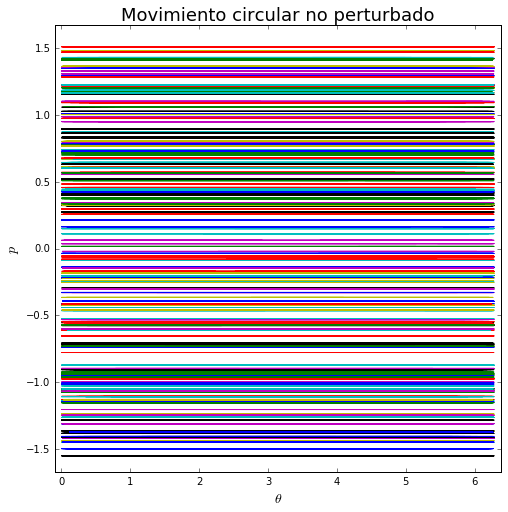

In [85]:
theta,p=mapeo_mov_circular() #pongo la funcion en practica con epsilon=0
figure(figsize=(8,8),dpi=100) #hago una figura
for i in xrange(len(theta)): #grafico para cada cond inicial
    plot(theta[i],p[i])
title("Movimiento circular no perturbado",fontsize=18) #titulo y etiquetas de los ejes
xlabel(r"$\theta$",fontsize=14),ylabel(r"$p$",fontsize=14)
xlim([-0.1,2*pi+0.1]),ylim([-0.1-pi/2,0.1+pi/2])

(c) ¿El sistema tiene puntos fijos para $\epsilon \neq 0$?. De ser afirmativa la respuesta, encuéntrelos y explique el significado de dichos puntos. Los puntos fijos son aquellos que cumplen que $θ_{i+1} = θ_i$ y $p_{i+1} = p_i$.

Si los hay, son puntos muy específicos pero se pueden encontrar facilmente.

De las expresiones:

$$
\theta_{i+1}=\theta_{i}+\omega \tau \implies \theta_{i+1}=\theta_{i}+\frac{p_{i+1}}{mR^2} \tau \hspace{1cm} mod(2 \pi)
$$
y

$$
p_{i+1}=p_{i}+\epsilon cos(\theta_{i})
$$

Para que $p_{i+1}=p_{i} \implies cos(\theta_{i})=0 \implies \theta_{i}=\frac{\pi}{2}$ o $\frac{3 \pi}{2}$

Y para que $\theta_{i+1}=\theta_{i}$, como esta en módulo $2 \pi \implies \theta_{i+1}=\theta_{i} + 2n \pi$ con $n \in \mathbb{Z}$

De la ecuacion de $\theta_{i+1}$, se deduce que $\frac{p_{i+1}}{mR^2} \tau=2n \pi \implies \frac{p_{i}}{mR^2}=2n \pi \implies p_{i}= \frac{2nmR^2 \pi}{\tau} $

Por tanto los puntos de equilibrio que encontramos para las condiciones dada son:

$$
\theta_{eq}=\frac{(2n+1)\pi}{2} \hspace{1cm} n=0,1
$$

$$
p_{eq}=\frac{2n \pi}{\tau} \hspace{1cm} n \in \mathbb{Z}\cap[-\frac{\tau}{4},\frac{\tau}{4}]
$$


(d) Realice simulaciones con $\epsilon = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.7, 1.1 ]$. Explique detalladamente sus resultados.

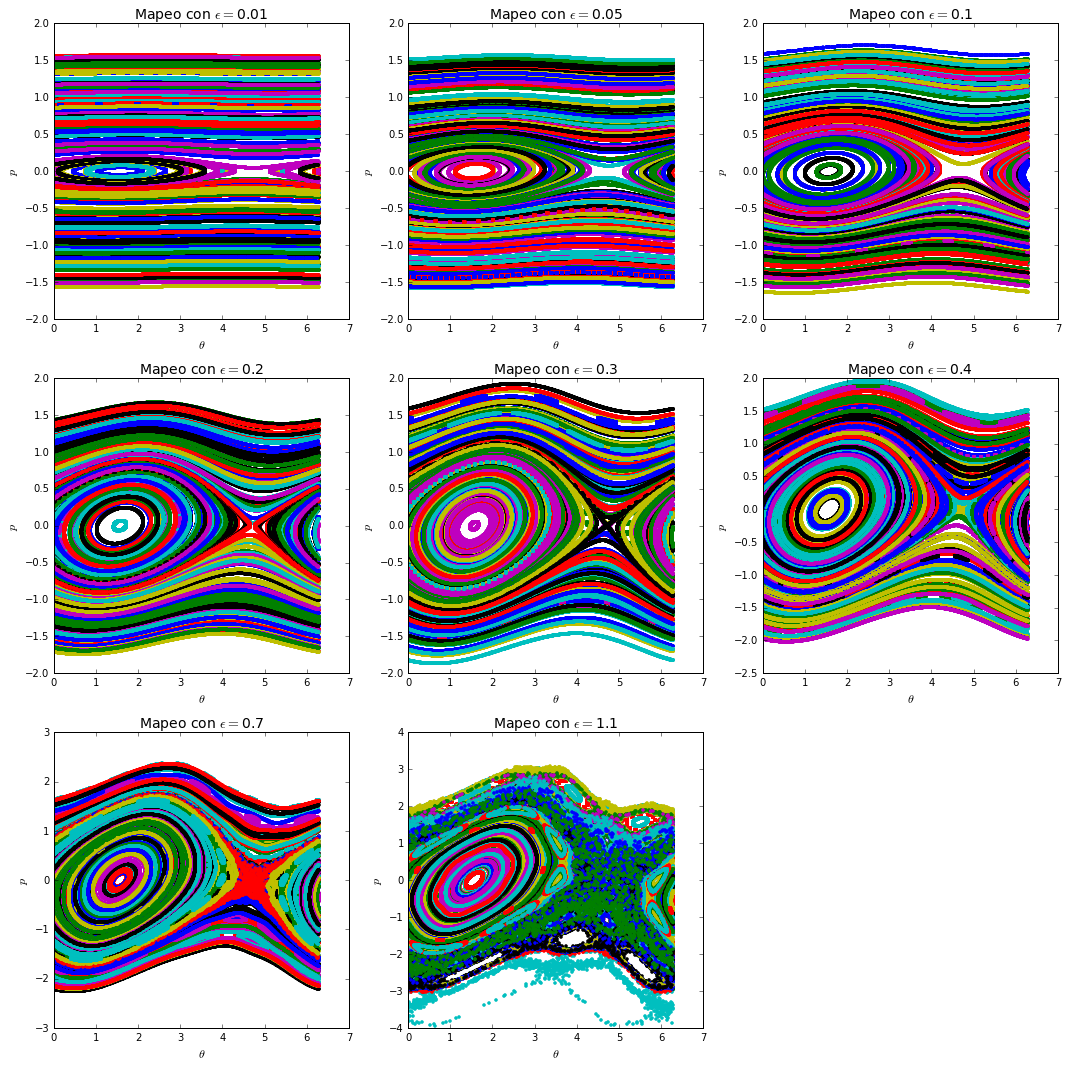

In [86]:
epsilon=[0.01,0.05,0.1,0.2,0.3,0.4,0.7,1.1] #lista de las epsilon
figure(figsize=(18,18)) #una figura
for i in xrange(len(epsilon)): #para cada epsilon
    subplot(3,3,i+1) #subfigura 
    theta,p=mapeo_mov_circular(epsilon[i],200,2000) #haz el mapeo con 200 condiciones y 2000 iteraciones
    for j in xrange(len(theta)): #y por cada cond inicial
        plot(theta[j],p[j],'.') #haz la grafica
    title(r"Mapeo con $\epsilon=$"+str(epsilon[i]),fontsize=14)
    xlabel(r"$\theta$",fontsize=12),ylabel(r"$p$",fontsize=12)

In [2]:
def ec_dif(x_y,t):
    x,y=x_y[0],x_y[1]
    dx=x_y[2]
    dy=x_y[3]
    dpx= -x-2*x*y
    dpy= -y-x*x+y*y
    return array([dx,dy,dpx,dpy])

In [3]:
def cond_iniciales(y,p_y,E=.1):
    p_x=sqrt((E-0.5*y*y+(1./3)*y**3)*2-p_y*p_y)
    return array([0,y,p_x,p_y])

[ 0.          0.3         0.35777088  0.        ]


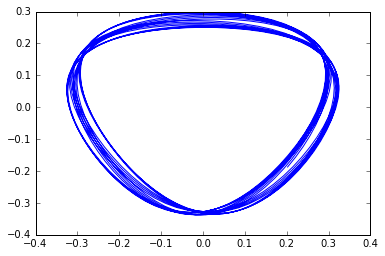

In [4]:
t=linspace(0,100,1000)
pto_ini=cond_iniciales(0.3,0)
sol=odeint(ec_dif,pto_ini,t)
plot(sol[:,0],sol[:,1])
print pto_ini

In [9]:
def cond_iniciales2(y0,p_x0,E,var1=0.05,var2=0.1):
    y=y0+var1*(2.*rand()-1.)
    p_x=p_x0+var2*(2.*rand()-1.)
    p_y=sqrt((E-0.5*y*y+(1./3)*y**3)*2-p_x*p_x)
    return array([0,y,p_x,p_y])

def root_trayec(func,pto_i,ti,error=1e-5):
    while abs(pto_i[0])>error:
        tip1 = ti - (pto_i[0]/pto_i[2])
        paso = odeint(func,pto_i,[ti,tip1])
        ti,pto_i = tip1,paso[-1]
    return ti,pto_i

def mapeo_poincare(ecuacion,condiciones,t,N=15):
    num=len(t)
    y,p_y=[],[]
    raices,puntos = zeros(num),zeros((num,4))
    for i in range(N):
        pto_ini = condiciones[i]
        sol = odeint(ecuacion,pto_ini,t,atol=1e-9,rtol=1e-9)
        num,raices,puntos = len(t),zeros(num),zeros((num,4))
        j=0
        for k in range(len(t)-1):
            if (sol[k][0]*sol[k+1][0]) < 0:
                raices[j],puntos[j] = root_trayec(ecuacion,sol[k],t[k])
                j+=1
        raices,puntos = raices[0:j],puntos[0:j]
        y.append(puntos[:,1])
        p_y.append(puntos[:,3])
    return y,p_y
        #plot(puntos[:,1],puntos[:,3],'.')
        #title(u"Mapeo de Poincare en $x=0$",fontsize=20)
        #xlabel("$y$",fontsize=14)
        #ylabel("$P_{y}$",fontsize=14)

In [10]:
def cond_ini(E):
    cond=[]
    for i in range(15):
        pto=cond_iniciales2(0.05,0,E)
        cond.append(pto)
    return cond

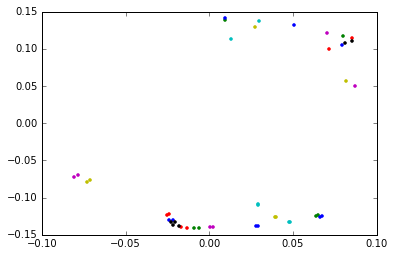

In [11]:
t=arange(0,10,0.001)
p_ini=cond_ini(0.01)
y,py=mapeo_poincare(ec_dif,p_ini,t)
for i in range(15):
    plot(y[i],py[i],'.')
#p_ini

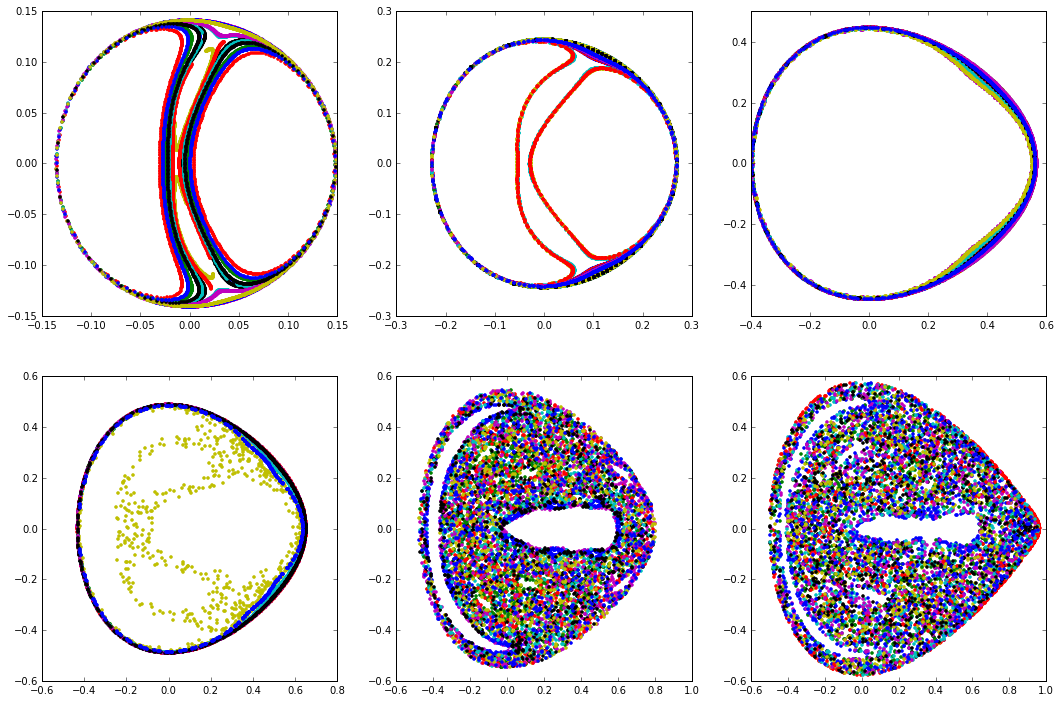

In [12]:
E=[0.01,0.03,0.1,0.12,0.15,0.166]
t=arange(0,2000,0.001)
figure(figsize=(18,12))
for i in range(len(E)):
    subplot(2,3,i+1)
    p_ini=cond_ini(E[i])
    y,p_y=mapeo_poincare(ec_dif,p_ini,t)
    for j in range(len(y)):
        plot(y[j],p_y[j],'.')